### MNIST DNN Project

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [1]:
# Get used to these imports!
#----------------------------------------------------------------#
#To install: pip install numpy
import numpy as np
#To install: pip install matplotlib
import matplotlib.pyplot as plt
#To install: pip install sklearn
import sklearn
#To install: pip install torchvision
import torchvision as tv
import torchvision.transforms as transforms
#To install: pip install torch (not GPU compatible)
import torch
import torch.nn as nn
#----------------------------------------------------------------#

In [2]:
# Below is the train/test data from MNIST. Try and find their shapes
#----------------------------------------------------------------#
train_data = tv.datasets.MNIST('./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = tv.datasets.MNIST('./data', train=False, transform=transforms.ToTensor(), download=True)
#----------------------------------------------------------------#
## TODO: Find and print the shapes of train_data and test_data
# Print the shape of data and the shape of labels
"""
Tips:
- To get just the data from (train/test)_data, you will need to do (train/test)_data.data
- To get just the labels from (train/test)_data, you will need to do (train/test)_data.targets
- Then use .numpy() to convert the data into a numpy array, which you can then call .shape on
"""
print(train_data.data.numpy().shape)
print(train_data.targets.numpy().shape)
print(test_data.data.numpy().shape)
print(test_data.targets.numpy().shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 338kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.82MB/s]

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The following code block is short, but ***incredibly important***. It shows how to set up a **Dataloader** which is needed to pass data through a neural network. Try to get familiar with the syntax.

In [3]:
# Creates dataloaders from the MNIST dataset
batch_size = 60
#----------------------------------------------------------------#
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
#----------------------------------------------------------------#

Lets visualize the data! This will be different than last time since we are workign with dataloaders.

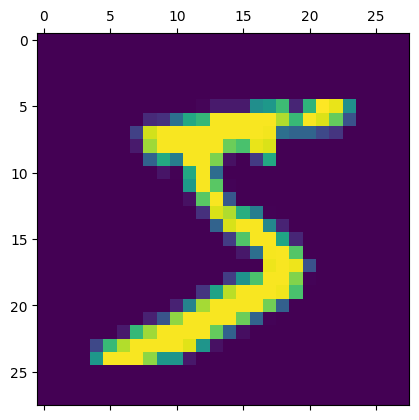

Associated Label: 5


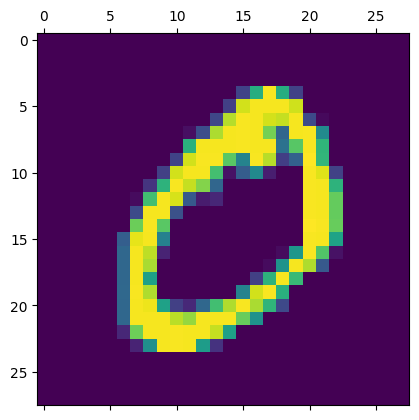

Associated Label: 0


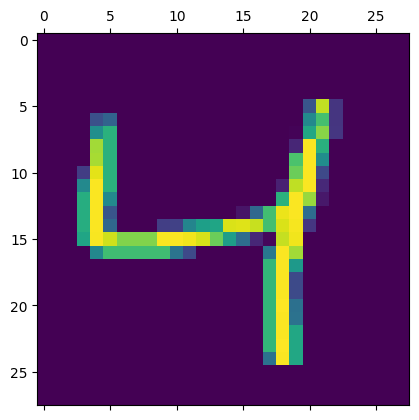

Associated Label: 4


In [4]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    to_reshape = train_data.data.numpy()[i]
    plt.matshow(to_reshape.reshape(28, 28))
    plt.show()
    print(f"Associated Label: {train_data.targets.numpy()[i]}")
#----------------------------------------------------------------#

Now its the time you've all been waiting for... Making your own neural network! Below an example network is defined **but it won't work with MNIST**. Try and use this syntactical example, along with google, to construct a DNN that works with the MNIST dataset! **This is most of the work of the project. Please try and do it!**

If you get stuck, take a look at how this tutorial did it:
- [MNIST DNN Tutorial](https://analyticsindiamag.com/guide-to-feed-forward-network-using-pytorch-with-mnist-dataset/)

In [7]:
# Goal: Make a neural network that can classify MNIST
# Provided below is a syntactical example of a DNN, study it and try and make one that will fit MNIST

"""
class DNN_EXAMPLE(nn.Module):
    def __init__(self):
        super(DNN_EXAMPLE, self).__init__()

        # Structure
        self.input_layer_size = 104
        self.hidden_layer_A_size = 51
        self.output_layer_size = 17

        # Layers
        self.l1 = nn.Linear(self.input_layer_size, self.hidden_layer_A_size)
        self.l2 = nn.Linear(self.hidden_layer_A_size, self.output_layer_size)

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    def forward(self, input):
        x = self.l1(input)
        x = self.sigmoid(x)
        x = self.l2(x)
        output = self.softmax(x)
        return output
"""

## TODO: Create the following required NN class that can work with MNIST data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 3 HIDDEN LAYERS AND DOES NOT HAVE HARDCODED LAYER SIZE VALUES!###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# MNIST_DNN: The name of your class
# model: An instance of MNIST_DNN
"""
Tips:
- Think about what input and output sizes you want
- Hidden layers can be most anything, just make sure to reduce gradually
- Remind yourself what activations are and why they are useful
- Make sure to name your class "MNIST_DNN"
- Instead of hardcoding the numbers in for the layer sizes, make them passable parameters
- Make sure to actually make your model using model = MNIST_DNN(...) as the last line
"""

class MNIST_DNN(nn.Module):
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        super(MNIST_DNN, self).__init__()

        # Structure
        self.input_layer_size = input_layer_size
        self.hidden_layer_A_size = hidden_layer_size
        self.output_layer_size = output_layer_size

        # Layers
        self.l1 = nn.Linear(self.input_layer_size, self.hidden_layer_A_size)
        self.l2 = nn.Linear(self.hidden_layer_A_size, self.output_layer_size)

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    def forward(self, input):
        x = self.l1(input)
        x = self.sigmoid(x)
        x = self.l2(x)
        output = self.softmax(x)
        return output

# Instantiate the model
model = MNIST_DNN(input_layer_size=784, hidden_layer_size=256, output_layer_size=10)

Awesome job! Feel free to check `mnist-dnn-ans.ipynb` to make sure you're on the right track. Next we will define our loss function and our method of optimization!

In [11]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adaptive Optimizer
#----------------------------------------------------------------#

Now we will make the training loop. Take a look at the "Creating our Training Loop" subsection of the tutorial below and transfer the code over. If it doesn't work, remmeber you always have the answer notebook to get you unstuck. **Remove all calls to "`.to(device)`"**

- [MNIST DNN Tutorial](https://analyticsindiamag.com/guide-to-feed-forward-network-using-pytorch-with-mnist-dataset/)

In [19]:
num_epochs = 6

## TODO: Implement the training loop as shown in the tutorial, but remove all calls to .to(device)
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_func(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Finally, we move onto the testing loop! This isn't incredibly difficult code so it's just provided below, but take a look at how it's structured and what it is doing.

Then run all your code and see what your **final accuracy** is!

In [20]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 97.33 %


Extensions:
- Mess with model hyperparameters, training epochs, data size, optimizers, loss functions, anything!
- Get accuracy above 97% consistently

### Congratulations on completing the project! Check your results with the notebook in the `answers` directory and then send your final accuracy to your club/channel/mentor!